In [1]:
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
import gc
import time
gc.enable()
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/home/mohan/miniconda3/envs/datascience/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mohan/miniconda3/envs/datascience/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Collect preprocessed data
data1 = pd.read_feather('data/Divvy_data_2017_Q1.feather')
data2 = pd.read_feather('data/Divvy_data_2017_Q2.feather')
data3 = pd.read_feather('data/Divvy_data_2017_Q3.feather')
data4 = pd.read_feather('data/Divvy_data_2017_Q4.feather')

data = pd.concat([data1, data2, data3, data4], ignore_index=True)

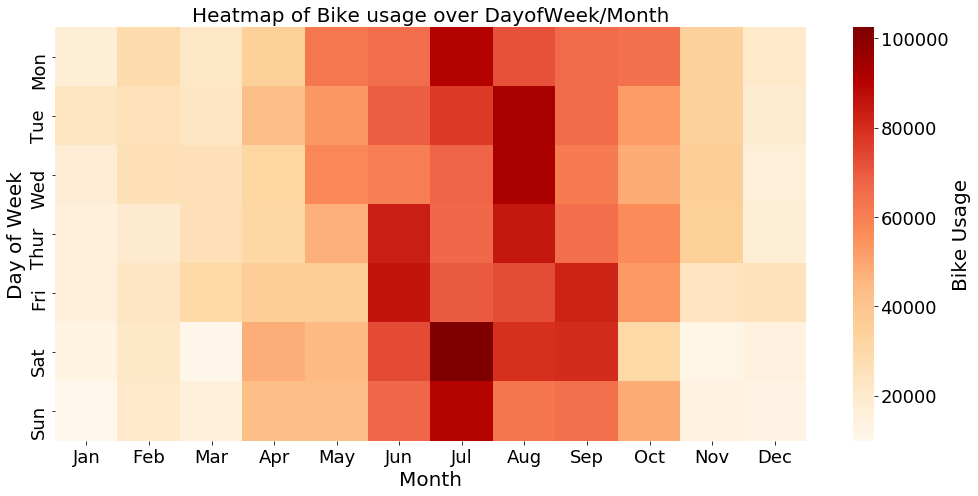

In [3]:
fig, ax = plt.subplots(figsize=(14, 7))
tmp = data[['dayofweek', 'month', 'tripduration']].groupby(['dayofweek', 'month']).count().reset_index()
pivots = tmp.pivot('dayofweek', 'month', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'}, cmap="OrRd")
ax.set_title('Heatmap of Bike usage over DayofWeek/Month', fontsize=20)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Day of Week', fontsize=20)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=18)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
                   , fontsize=18)
ax.figure.axes[-1].set_ylabel('Bike Usage', size=20)
ax.figure.axes[-1].tick_params(labelsize=18)
plt.tight_layout()
plt.show()

### Bike usage over summer is much higher than other seasons. This is not suprising since summer in Chicago is really nice and winter in Chicago is terrible. It is icy and cold in winter which makes bike riding not safe. 

### However, there is not clear trend of bike usage over day of week. We found that bike usage over different day of week varies from month to month. This implies that other factors might play important roles here for example weather of the day, traffic of the day and whether or not there are recent crimes around the bike stations.